# Introduction to Data Science
## Homework 5

Student Name: Chengwei Chen

Student Netid: cc6576
***

### Part 1: Naive Bayes (5 Points)

1\. From your reading you know that the naive Bayes classifier works by calculating the conditional probabilities of each feature, $e_i$, occuring with each class $c$ and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence, $E$, as

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

The conditional probability of each piece of evidence occuring with a given class is given by

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

In the above equation $\text{count}(e_i, c)$ is the number of documents in a given class that contain feature $e_i$ and $\text{count}(c)$ is the number of documents that belong to class $c$. 

A common variation of the above is to use Laplace (sometimes called +1) smoothing. Recall the use of Laplace smoothing introduced toward the end of Chapter 3 in the section Probability Estimation. This is done in sklearn by setting `alpha=1` in the `BernoulliNB()` function (this is also the default behavior). The result of Laplace smoothing will slightly change the conditional probabilities,

$$P(e_i \mid c) = \frac{\text{count}(e_i, c) + 1}{\text{count}(c) + 2}.$$

In no more than **one paragraph**, describe why this is useful, and use the bias-variance tradeoff to justify its use. Try to think of a case when not using Laplace smoothing would result in "bad" models. Try to give an example. Be precise.

Answer here!

Laplace smoothing is useful especially when we have unknown words in test set, but not appear in training set. For instance, if the number of documents in a given class $c$ that contain feature $e_i$ is zero, which means ${\text{count}}{(e_i, c)} = 0$ and then the probability of that document being in any class would be 0, so the idea of Laplace smoothing could adjust data so that zeros become some more or less arbitrary small values.

### Part 2: Text classification for sentiment analysis (20 Points)
For this part of the assignment, we are going to use a data set of movie ratings from IMDB.com. The data consists of the text of a movie review and a target variable which tells us whether the reviewer had a positive feeling towards the movie (equivalent to rating the movie between 7 and 10) or a negative feeling (rating the movie between 1 and 4). Neutral reactions are not included in the data.

The first column is the review text; the second is the text label 'P' for positive or 'N' for negative.

1 (1 Point) \. Load the data into a pandas `DataFrame()`.

In [2]:
# Code here
import pandas as pd 
data = pd.read_csv("imdb.csv")
data = data.dropna()
data.head()

,Text,Class
0,'One of the first of the best musicals Anchors...,P
1,'Visually disjointed and full of itself the di...,N
2,'These type of movies about young teenagers st...,P
3,'I would rather of had my eyes gouged out with...,N
4,'The title says it all. Tail Gunner Joe was a ...,N


2 (1 Point)\. Code the target variable to be numeric: use the value `1` to represent 'P' and `0` to represent 'N'.

In [3]:
# Code here
data['Class'] = data.apply(lambda x:1 if x['Class'] == "P" else 0, axis = 1)
data.head()

,Text,Class
0,'One of the first of the best musicals Anchors...,1
1,'Visually disjointed and full of itself the di...,0
2,'These type of movies about young teenagers st...,1
3,'I would rather of had my eyes gouged out with...,0
4,'The title says it all. Tail Gunner Joe was a ...,0


3 (2 Points)\. Put all of the text into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. Feel free to use any function from sklearn.

In [4]:
#Code here
from sklearn.model_selection import train_test_split

X = pd.DataFrame(data['Text'])
Y = pd.DataFrame(data['Class'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75)
#X_train.head()
#X_train.shape

4 (5 Points)\. Create a binary `CountVectorizer()` and a binary `TfidfVectorizer()`. Use the original single words as well as bigrams (in the same model). Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. Hint - look at the API documentation for both vectorizers to see what we mean by "binary."

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_binary = CountVectorizer(binary = True, stop_words = 'english', ngram_range=(1, 2))
X_train_count_binary = count_binary.fit_transform(X_train['Text'])
X_test_count_binary = count_binary.transform(X_test['Text'])

tfidf_binary = TfidfVectorizer(binary = True, stop_words = 'english', ngram_range=(1, 2))
X_train_tfidf_binary = tfidf_binary.fit_transform(X_train['Text'])
X_test_tfidf_binary = tfidf_binary.transform(X_test['Text'])
#print(X_train_count_binary)
#print(X_train_tfidf_binary)

5 (6 Points)\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both vectorizers defined above. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph.

Extra credit (2 points): Do any of the options perform identically? If so, can you explain why?

In [6]:
# Run this so your plots show properly
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

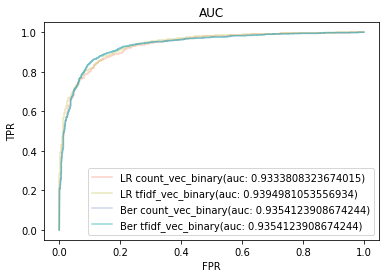

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
import numpy as np

# Code here
d = {"count_vec_binary": (X_train_count_binary, X_test_count_binary), 
     "tfidf_vec_binary": (X_train_tfidf_binary, X_test_tfidf_binary)}
lr = LogisticRegression(solver='lbfgs')

for i in d:
    lr.fit(d[i][0], Y_train['Class'])
    train_predict = lr.predict_proba(d[i][1])[:, 1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test['Class'], train_predict)
    auc = metrics.auc(fpr, tpr)
    randc = (np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color = randc, label = "LR" + " " + i + "(auc: " + str(auc) + ")")

ber = BernoulliNB()
for i in d:
    ber.fit(d[i][0], Y_train['Class'])
    train_predict = ber.predict_proba(d[i][1])[:, 1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test['Class'], train_predict)
    auc = metrics.auc(fpr, tpr)
    randc = (np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color = randc, label = "Ber" + " " + i + "(auc: " + str(auc) + ")")
plt.title("AUC")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()


In [10]:
print(type(Y_test))

<class 'pandas.core.frame.DataFrame'>


Explanation here!
1. From the AUC graph, the logistic regression on binary tfidf vectorizer performs better as it obtains the highest AUC score. However, Bernoulli Naive Bayes holds independence assumption and in this case the features(words) are not independent to each other. Rather, they depend on the context or previous word or even previous word of the previous word. 

2. (Extra Credit) The Bernoulli on binary count vectorizer and binary tfidf vectorizer perform identically because in Bernoulli Naive Bayes model, the target variable is binary(0 or 1) which is exactly the count vectorizer, and the model treats every non-zero number as 1 in tfidf vectorizer; therefore, they yield the same result. 

5\. Use the model from question 4 that you think did the best job and predict the rating of the test data. Find 5 examples were labeled positive, but were incorrectly classified as negative. Print out the reviews below and include an explanation as to why you think it may have been incorrectly classified. You can pick any 5. They do not have to be at random.

In [8]:
# Code here to display 5 incorrect reviews.
clfr = LogisticRegression(solver='lbfgs')
clfr.fit(X_train_tfidf_binary, Y_train)
pred = clfr.predict(X_test_tfidf_binary)
count = 0

for i in range(len(pred)):
    if Y_test.iloc[i].values == 1 and pred[i] == 0:
        count = count + 1
        print("Review: ", X_test.iloc[i].values[0], "\n")
    if count >= 5:
        break

/Users/chengweichen/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Review:  'No one would argue that this 1945 war film was a masterpiece. (How could any 1945 war film be a masterpiece?) And yet this is an extremely effective telling of a true story that of Al Schmidt blinded on Guadalcanal as played by John Garfield who spent days wearing a blindfold to capture the nuances of a blind persons actions. Robert Leckie in Helmet for My Pillowdenigrates Schmidts popularity in favor of his foxhole mate who was killed writing that the country must have needed live heroes.  Well I suppose the country did. And they had one here. There is a single combat scene in the movie bound to the studio lot lasting only ten minutes or so and occurring less than halfway through the film instead of being saved for the climax but it is the scariest and most realistic depiction of men under fire that I can remember having seen on screen including those in Saving Private Ryan. Men yell with fear scream at each other and at the enemy and bleed and die without the aid of color s

Explanation for the 5 reviews chosen here!

1. The reviewer summarizes the movie at first with negative expression such as "disappointed" and uses a lot of negative words like "not" and question sentences, so it confuses the classifier and makes it to be a negative review.

2. The reviewer holds neutral opinion and provides slightly negative comments about the movie in almost whole paragraph, besides the last sentence "all in all this is a really good movie for just about all ages", so the model classifier assumes this review as negative.  

3. Similar to previous review, the reviewer criticizes the movie by using negative words like "silly" and "implausible" at the beginning, but the reviewer changes opinion afterwards and gives conclusion at the end "I highly recommend this movie". Therefore, like the last example the model classifier assumes this review as negative.

4. This review is pretty neutral and we can't see any strong positive or negative opinions from reviewer. Mostly, the reviewer discusses the storyline of the movie series and the narrator of the movie. 

5. Similar to the second and third review examples, the reviewer doesn't give specific strong positive or negative expressions to the movie, but at the end we can see that the reviewer actually evaluates the movie as "10 points". I think that since the model classifier doesn't really understand the number, it just classifies this as negative.
